In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [2]:
df = pd.read_csv("data/sintmartenslatemlaan_per-hour.csv")
df.head()


,instance_id,segment_id,date,interval,uptime,heavy,car,bike,pedestrian,night,...,bike_rgt,pedestrian_lft,pedestrian_rgt,night_lft,night_rgt,direction,car_speed_hist_0to70plus,car_speed_hist_0to120plus,timezone,v85
0,-1,9000008372,2025-11-21T08:00:00.000Z,hourly,0.499722,0.0,34.0,4.0,4.0,0.0,...,0.0,2.0,2.0,0.0,0.0,1,"[58.8235294118, 17.6470588235, 17.6470588235, ...","[52.9411764706, 5.8823529412, 5.8823529412, 11...",Europe/Paris,27.5
1,-1,9000008372,2025-11-21T09:00:00.000Z,hourly,0.999444,0.0,39.0,11.0,6.0,0.0,...,3.0,1.0,5.0,0.0,0.0,1,"[61.5384615385, 17.9487179487, 10.2564102564, ...","[48.7179487179, 12.8205128205, 12.8205128205, ...",Europe/Paris,25.5
2,-1,9000008372,2025-11-21T10:00:00.000Z,hourly,0.999167,2.0,31.0,16.0,6.0,0.0,...,8.0,3.0,3.0,0.0,0.0,1,"[48.3870967742, 19.3548387097, 19.3548387097, ...","[45.1612903226, 3.2258064516, 6.4516129032, 12...",Europe/Paris,29.5
3,-1,9000008372,2025-11-21T11:00:00.000Z,hourly,0.999722,1.0,47.0,30.0,20.0,0.0,...,20.0,9.0,11.0,0.0,0.0,1,"[48.9361702128, 21.2765957447, 12.7659574468, ...","[42.5531914894, 6.3829787234, 12.7659574468, 8...",Europe/Paris,32.5
4,-1,9000008372,2025-11-21T12:00:00.000Z,hourly,0.999167,1.0,26.0,19.0,36.0,0.0,...,10.0,17.0,19.0,0.0,0.0,1,"[53.8461538462, 11.5384615385, 7.6923076923, 1...","[50.0, 3.8461538462, 3.8461538462, 7.692307692...",Europe/Paris,35.5


In [3]:
df.info()
df.shape
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083 entries, 0 to 1082
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   instance_id                1083 non-null   int64  
 1   segment_id                 1083 non-null   int64  
 2   date                       1083 non-null   object 
 3   interval                   1083 non-null   object 
 4   uptime                     1083 non-null   float64
 5   heavy                      1083 non-null   float64
 6   car                        1083 non-null   float64
 7   bike                       1083 non-null   float64
 8   pedestrian                 1083 non-null   float64
 9   night                      1083 non-null   float64
 10  heavy_lft                  1083 non-null   float64
 11  heavy_rgt                  1083 non-null   float64
 12  car_lft                    1083 non-null   float64
 13  car_rgt                    1083 non-null   float

instance_id                    0
segment_id                     0
date                           0
interval                       0
uptime                         0
heavy                          0
car                            0
bike                           0
pedestrian                     0
night                          0
heavy_lft                      0
heavy_rgt                      0
car_lft                        0
car_rgt                        0
bike_lft                       0
bike_rgt                       0
pedestrian_lft                 0
pedestrian_rgt                 0
night_lft                      0
night_rgt                      0
direction                      0
car_speed_hist_0to70plus       0
car_speed_hist_0to120plus      0
timezone                       0
v85                          677
dtype: int64

In [4]:
df["datetime"] = pd.to_datetime(df["date"], errors="coerce")
df = df.sort_values("datetime")
df[["datetime", "interval", "car", "bike", "pedestrian"]].head()


,datetime,interval,car,bike,pedestrian
0,2025-11-21 08:00:00+00:00,hourly,34.0,4.0,4.0
1,2025-11-21 09:00:00+00:00,hourly,39.0,11.0,6.0
2,2025-11-21 10:00:00+00:00,hourly,31.0,16.0,6.0
3,2025-11-21 11:00:00+00:00,hourly,47.0,30.0,20.0
4,2025-11-21 12:00:00+00:00,hourly,26.0,19.0,36.0


2025-11-21 08:00:00+00:00 2026-01-05 10:00:00+00:00


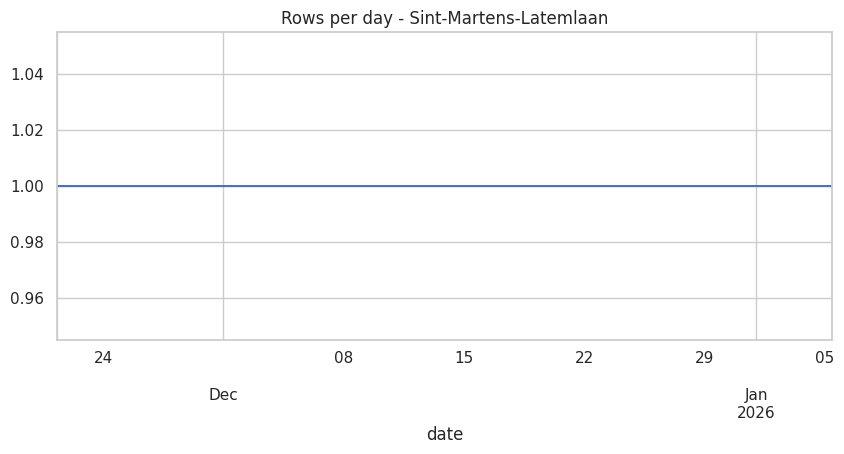

In [5]:
df["date"] = pd.to_datetime(df["date"])
print(df["date"].min(), df["date"].max())

daily_counts = df.groupby("date").size()
daily_counts.describe()
daily_counts.plot(kind="line", figsize=(10,4),
                  title="Rows per day - Sint-Martens-Latemlaan")
plt.show()


In [6]:
num_cols = ["heavy","car","bike","pedestrian"]
df[num_cols].describe()


,heavy,car,bike,pedestrian
count,1083.000000,1083.000000,1083.000000,1083.000000
mean,0.688298,9.572106,1.900721,5.163531
std,1.703577,15.338246,4.132427,12.069832
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,17.099885,2.000000,3.255395
max,18.039106,75.163290,45.000000,95.000000


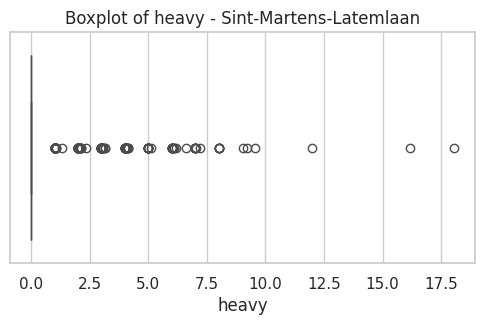

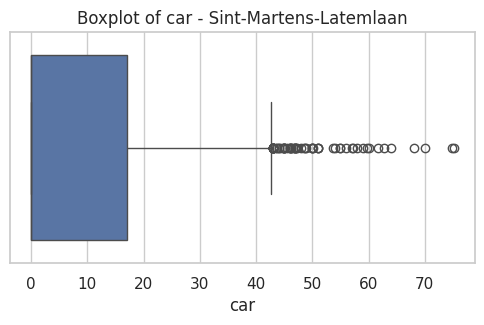

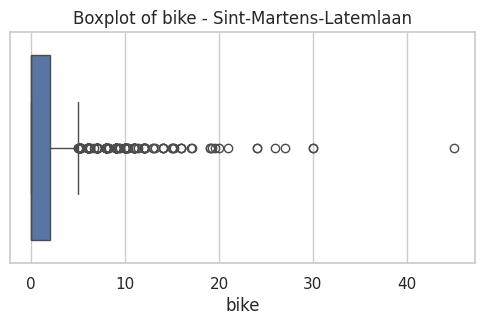

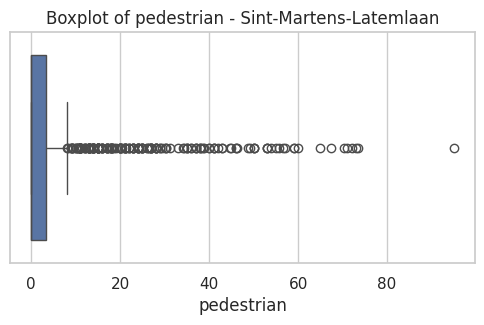

In [7]:
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col} - Sint-Martens-Latemlaan")
    plt.show()


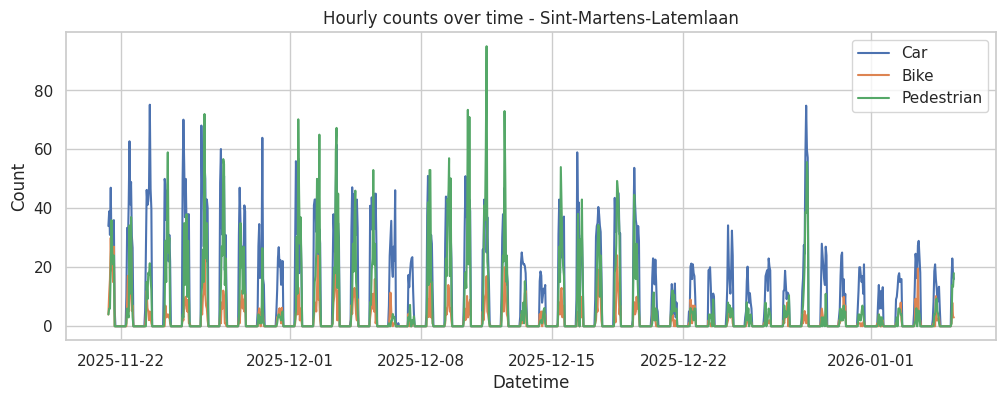

In [8]:
plt.figure(figsize=(12,4))
plt.plot(df["datetime"], df["car"], label="Car")
plt.plot(df["datetime"], df["bike"], label="Bike")
plt.plot(df["datetime"], df["pedestrian"], label="Pedestrian")
plt.legend()
plt.title("Hourly counts over time - Sint-Martens-Latemlaan")
plt.xlabel("Datetime")
plt.ylabel("Count")
plt.show()


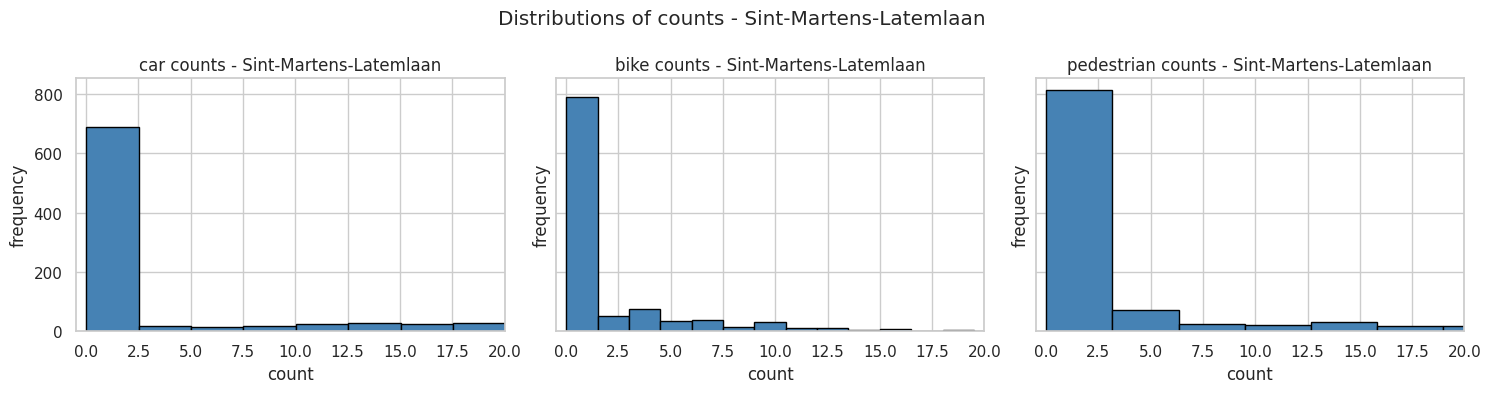

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15,4), sharey=True)

cols = ["car", "bike", "pedestrian"]

for ax, col in zip(axes, cols):
    ax.hist(df[col], bins=30, color="steelblue", edgecolor="black")
    ax.set_title(f"{col} counts - Sint-Martens-Latemlaan")
    ax.set_xlabel("count")
    ax.set_ylabel("frequency")
    ax.set_xlim(-0.5, 20)

plt.suptitle("Distributions of counts - Sint-Martens-Latemlaan")
plt.tight_layout()
plt.show()


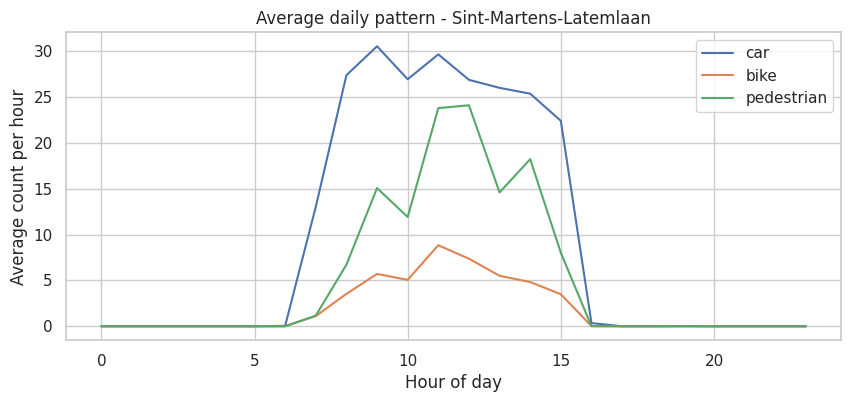

In [10]:
df["hour"] = df["datetime"].dt.hour

avg_by_hour = df.groupby("hour")[["car", "bike", "pedestrian"]].mean()

plt.figure(figsize=(10,4))
for col in ["car", "bike", "pedestrian"]:
    plt.plot(avg_by_hour.index, avg_by_hour[col], label=col)
plt.xlabel("Hour of day")
plt.ylabel("Average count per hour")
plt.title("Average daily pattern - Sint-Martens-Latemlaan")
plt.legend()
plt.show()
